# The Six Postulates of Quantum Mechanics

It is a common challenge for students to bridge the notational and conceptual gap between the mathematics they have already learned and the new framework presented in quantum mechanics. Here is a breakdown of David McIntyre's six postulates of quantum mechanics, translated into the language of linear algebra, probability, and differential equations, complete with concrete mathematical examples and Python visualizations.

## Code Preamble: Import Libraries and Helper Functions

First, we import the necessary Python libraries and define a helper function to plot vectors on the Bloch sphere, which is a standard way to visualize the state of a two-level quantum system (a qubit).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.linalg import expm

# =============================================================================
# Helper Functions for Bloch Sphere Visualization
# =============================================================================

def plot_bloch_sphere(ax, states=[], labels=[], colors=[], title=""):
    """
    Plots the Bloch sphere and given state vectors.
    """
    # Draw the sphere
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    x = np.outer(np.cos(u), np.sin(v))
    y = np.outer(np.sin(u), np.sin(v))
    z = np.outer(np.ones(np.size(u)), np.cos(v))

    ax.plot_surface(x, y, z, color='lightcyan', alpha=0.1)
    ax.set_box_aspect([1,1,1]) # Set aspect ratio to be a sphere

    # Draw axes
    ax.plot([-1, 1], [0, 0], [0, 0], color='gray', linestyle='--')
    ax.plot([0, 0], [-1, 1], [0, 0], color='gray', linestyle='--')
    ax.plot([0, 0], [0, 0], [-1, 1], color='gray', linestyle='--')

    # Add axis labels
    ax.text(0, 0, 1.1, "|0⟩ (Z-axis)")
    ax.text(0, 0, -1.2, "|1⟩")
    ax.text(1.1, 0, 0, "|+⟩ (X-axis)")
    ax.text(-1.3, 0, 0, "|-⟩")
    ax.text(0, 1.1, 0, "|i⟩ (Y-axis)")
    ax.text(0, -1.3, 0, "|-i⟩")

    # Plot each state
    for i, state in enumerate(states):
        # Convert state vector [alpha, beta] to Bloch sphere coordinates
        alpha, beta = state[0, 0], state[1, 0]
        # Handle the case where alpha is zero to avoid division by zero in tan
        if np.abs(alpha) < 1e-9:
            theta = np.pi
        else:
            theta = 2 * np.arccos(np.abs(alpha))

        phi = np.angle(beta) - np.angle(alpha)

        # Convert spherical to Cartesian
        x_coord = np.sin(theta) * np.cos(phi)
        y_coord = np.sin(theta) * np.sin(phi)
        z_coord = np.cos(theta)

        label = labels[i] if i < len(labels) else ''
        color = colors[i] if i < len(colors) else 'r'

        ax.quiver(0, 0, 0, x_coord, y_coord, z_coord, color=color, length=1,
                  arrow_length_ratio=0.2, label=label)

    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    if labels:
        ax.legend()

## Postulate 1: The State of the System
**Quantum Mechanics Statement:** The state of a quantum mechanical system is completely described by a state vector $|\psi\rangle$, which is a vector in a complex vector space known as a Hilbert space.

**Translation into Linear Algebra:**
Think of a quantum state as simply a **vector**. The notation $|\psi\rangle$, called a "ket," is just the quantum mechanics way of writing a column vector. The space this vector lives in is a complex vector space, meaning the components of the vector can be complex numbers. For our purposes, the term "Hilbert space" can be thought of as a complex vector space equipped with an inner product (a way to multiply vectors to get a scalar).

A key property of these state vectors is that they are normalized, meaning their length is 1.

**Concrete Mathematical Example:**
Let's consider a very simple quantum system that can only be in one of two states, which we'll call state 1 and state 2. The mathematical space for this system is the complex vector space $\mathbb{C}^2$, which is the set of all two-component column vectors with complex entries.

A possible state vector for this system could be:
$$
|\psi\rangle = \begin{pmatrix} \frac{1}{\sqrt{2}} \\ \frac{i}{\sqrt{2}} \end{pmatrix}
$$
This is a vector in $\mathbb{C}^2$. The "bra" corresponding to this "ket" is its conjugate transpose:
$$
\langle\psi| = \begin{pmatrix} \frac{1}{\sqrt{2}} & -\frac{i}{\sqrt{2}} \end{pmatrix}
$$
The normalization condition means that the inner product of the vector with itself, $\langle\psi|\psi\rangle$, must equal 1:
$$
\langle\psi|\psi\rangle = \begin{pmatrix} \frac{1}{\sqrt{2}} & -\frac{i}{\sqrt{2}} \end{pmatrix} \begin{pmatrix} \frac{1}{\sqrt{2}} \\ \frac{i}{\sqrt{2}} \end{pmatrix} = \left(\frac{1}{\sqrt{2}}\right)\left(\frac{1}{\sqrt{2}}\right) + \left(-\frac{i}{\sqrt{2}}\right)\left(\frac{i}{\sqrt{2}}\right) = \frac{1}{2} - \frac{i^2}{2} = \frac{1}{2} + \frac{1}{2} = 1
$$

--- Postulate 1: The State of the System ---
State vector |ψ⟩:
[[0.4472136+0.j        ]
 [0.       +0.89442719j]]

Bra <ψ|:
[[0.4472136-0.j         0.       -0.89442719j]]

Normalization <ψ|ψ>: 1.00+0.00j



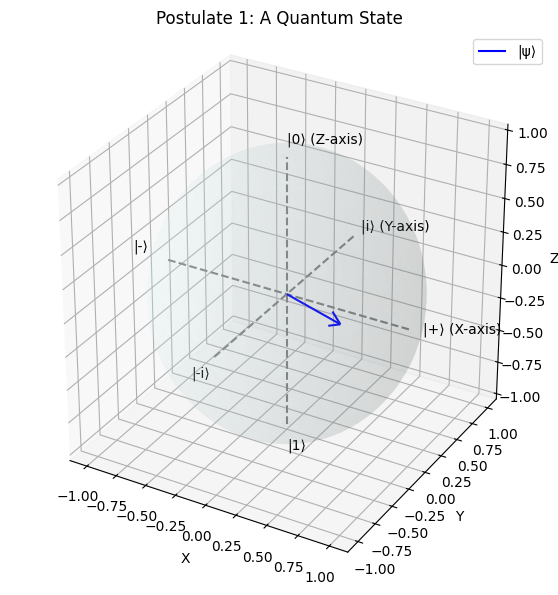

In [ ]:
print("--- Postulate 1: The State of the System ---")

# A quantum state is a normalized vector in a complex vector space.
# Let's define a state |ψ⟩ = (1/√5)|0⟩ + (2i/√5)|1⟩
psi = np.array([[1/np.sqrt(5)], [2j/np.sqrt(5)]])

# Verify normalization: <ψ|ψ> should be 1
# <ψ| is the conjugate transpose of |ψ>
psi_bra = psi.conj().T
norm = psi_bra @ psi
print(f"State vector |ψ⟩:\n{psi}\n")
print(f"Bra <ψ|:\n{psi_bra}\n")
print(f"Normalization <ψ|ψ>: {norm[0,0]:.2f}\n")

# Visualization
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
plot_bloch_sphere(ax, [psi], ["|ψ⟩"], ["blue"], "Postulate 1: A Quantum State")
plt.show()

## Postulate 2: Observables and Operators
**Quantum Mechanics Statement:** Every measurable physical quantity, known as an observable, is represented by a linear, Hermitian operator that acts on the state vectors in the Hilbert space.

**Translation into Linear Algebra:**
An "observable" is any physical property you can measure, like position, momentum, or energy. In the mathematical framework, these are represented by **Hermitian matrices**. A Hermitian matrix is a square matrix that is equal to its own conjugate transpose (i.e., $A = A^\dagger$). A crucial property of Hermitian matrices is that their eigenvalues are always real numbers, which makes sense since the result of a physical measurement must be a real number.

**Concrete Mathematical Example:**
Continuing with our two-level system, let's say we want to measure a physical quantity we'll call "M". This observable M must be represented by a 2x2 Hermitian matrix. A common example is one of the Pauli matrices, say $\sigma_x$:
$$
M = \sigma_x = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}
$$
This matrix is Hermitian because its conjugate transpose is itself. This matrix will "operate" on state vectors by standard matrix-vector multiplication.


--- Postulate 2: Observables and Operators ---
Pauli X:
[[0 1]
 [1 0]]
Is Hermitian? True

Pauli Y:
[[ 0.+0.j -0.-1.j]
 [ 0.+1.j  0.+0.j]]
Is Hermitian? True

Pauli Z:
[[ 1  0]
 [ 0 -1]]
Is Hermitian? True

Action of σ_x on |0⟩: σ_x|0⟩ = 
[[0]
 [1]]


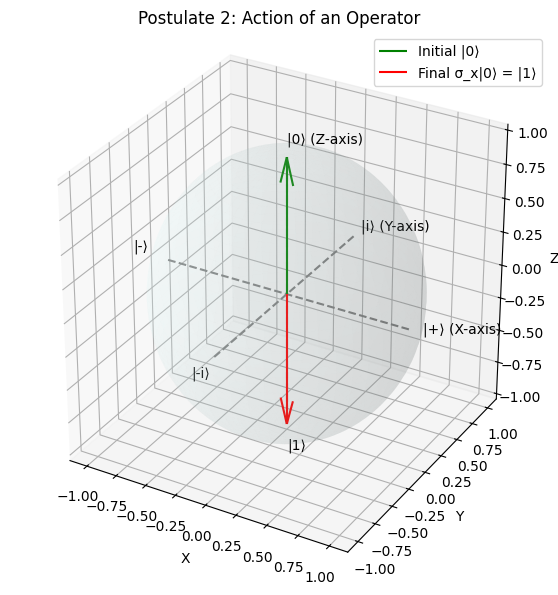

In [ ]:
print("\n--- Postulate 2: Observables and Operators ---")

# Observables are Hermitian matrices. Let's define the Pauli matrices.
sigma_x = np.array([[0, 1], [1, 0]])
sigma_y = np.array([[0, -1j], [1j, 0]])
sigma_z = np.array([[1, 0], [0, -1]])

def is_hermitian(matrix):
    return np.allclose(matrix, matrix.conj().T)

print(f"Pauli X:\n{sigma_x}\nIs Hermitian? {is_hermitian(sigma_x)}\n")
print(f"Pauli Y:\n{sigma_y}\nIs Hermitian? {is_hermitian(sigma_y)}\n")
print(f"Pauli Z:\n{sigma_z}\nIs Hermitian? {is_hermitian(sigma_z)}\n")

# Visualize the action of an operator. Let's see what σ_x does to |0⟩.
state_0 = np.array([[1], [0]])
final_state = sigma_x @ state_0
print(f"Action of σ_x on |0⟩: σ_x|0⟩ = \n{final_state}")

# Visualization
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
plot_bloch_sphere(ax, [state_0, final_state], ["Initial |0⟩", "Final σ_x|0⟩ = |1⟩"],
                  ["green", "red"], "Postulate 2: Action of an Operator")
plt.show()

## Postulate 3: Possible Outcomes of a Measurement
**Quantum Mechanics Statement:** The only possible result of a measurement of an observable is one of the eigenvalues of the corresponding operator.

**Translation into Linear Algebra:**
When you perform a measurement in a quantum system, you won't get just any value. The only possible outcomes are the **eigenvalues** of the Hermitian matrix that represents that observable.

**Concrete Mathematical Example:**
Let's find the possible measurement outcomes for our observable $M = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}$. We need to find its eigenvalues ($\lambda$) by solving the characteristic equation $\det(M - \lambda I) = 0$:
$$
\det\left(\begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix} - \lambda\begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix}\right) = \det\begin{pmatrix} -\lambda & 1 \\ 1 & -\lambda \end{pmatrix} = 0
$$
$$
(-\lambda)(-\lambda) - (1)(1) = \lambda^2 - 1 = 0
$$
The eigenvalues are $\lambda_1 = 1$ and $\lambda_2 = -1$.

Therefore, if we measure the physical quantity M, the only possible results we can get are 1 or -1.


--- Postulate 3: Possible Outcomes of a Measurement ---
Measuring the observable σ_z:
[[ 1  0]
 [ 0 -1]]

Possible measurement outcomes (eigenvalues): 1 and -1

Eigenvector for eigenvalue 1:
[[1.]
 [0.]]

Eigenvector for eigenvalue -1:
[[0.]
 [1.]]



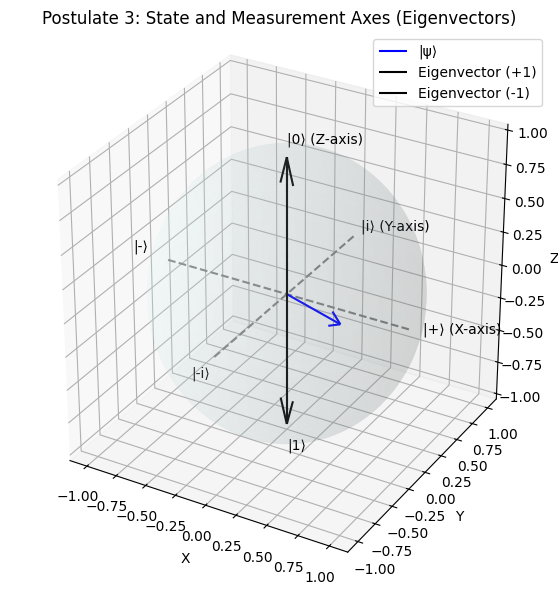

In [ ]:
print("\n--- Postulate 3: Possible Outcomes of a Measurement ---")

# The possible results of a measurement are the eigenvalues of the observable.
observable = sigma_z
eigenvalues, eigenvectors = np.linalg.eig(observable)

print(f"Measuring the observable σ_z:\n{observable}\n")
print(f"Possible measurement outcomes (eigenvalues): {eigenvalues[0]:.0f} and {eigenvalues[1]:.0f}\n")
print(f"Eigenvector for eigenvalue {eigenvalues[0]:.0f}:\n{eigenvectors[:, 0].reshape(-1, 1)}\n")
print(f"Eigenvector for eigenvalue {eigenvalues[1]:.0f}:\n{eigenvectors[:, 1].reshape(-1, 1)}\n")

# Visualization
# The eigenvectors are the possible "collapse" states.
eigenvector1 = eigenvectors[:, 0].reshape(-1, 1)
eigenvector2 = eigenvectors[:, 1].reshape(-1, 1)

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
plot_bloch_sphere(ax,
                  [psi, eigenvector1, eigenvector2],
                  ["|ψ⟩", "Eigenvector (+1)", "Eigenvector (-1)"],
                  ["blue", "black", "black"],
                  "Postulate 3: State and Measurement Axes (Eigenvectors)")
plt.show()

## Postulate 4: The Probability of a Measurement Outcome
**Quantum Mechanics Statement:** The probability of obtaining a specific eigenvalue $a_n$ in a measurement of the observable $A$ on a system in the state $|\psi\rangle$ is given by the square of the magnitude of the inner product of the corresponding eigenvector $|\phi_n\rangle$ and the state vector $|\psi\rangle$.

**Translation into Probability and Linear Algebra:**
To find the probability of measuring a specific eigenvalue, you first find the corresponding eigenvector. Then, you calculate the **projection** of your system's state vector onto that eigenvector. The probability is the squared magnitude of this projection. In mathematical terms, the probability $P(a_n)$ of measuring eigenvalue $a_n$ is given by $P(a_n) = |\langle\phi_n|\psi\rangle|^2$, where $|\phi_n\rangle$ is the normalized eigenvector for $a_n$.

**Concrete Mathematical Example:**
Let's find the eigenvectors of our observable $M = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}$.

For $\lambda_1 = 1$:
$$ \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix} \begin{pmatrix} x \\ y \end{pmatrix} = 1 \begin{pmatrix} x \\ y \end{pmatrix} \implies y=x. \text{ The normalized eigenvector is } |\phi_1\rangle = \frac{1}{\sqrt{2}}\begin{pmatrix} 1 \\ 1 \end{pmatrix}. $$
For $\lambda_2 = -1$:
$$ \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix} \begin{pmatrix} x \\ y \end{pmatrix} = -1 \begin{pmatrix} x \\ y \end{pmatrix} \implies y=-x. \text{ The normalized eigenvector is } |\phi_2\rangle = \frac{1}{\sqrt{2}}\begin{pmatrix} 1 \\ -1 \end{pmatrix}. $$
Now, suppose our system is in the state $|\psi\rangle = \frac{1}{\sqrt{5}}\begin{pmatrix} 1 \\ 2 \end{pmatrix}$. What is the probability of measuring 1 or -1 for the observable M?

Probability of measuring 1:
$$ P(1) = |\langle\phi_1|\psi\rangle|^2 = \left| \left( \frac{1}{\sqrt{2}}\begin{pmatrix} 1 & 1 \end{pmatrix} \right) \left( \frac{1}{\sqrt{5}}\begin{pmatrix} 1 \\ 2 \end{pmatrix} \right) \right|^2 = \left| \frac{1}{\sqrt{10}}(1+2) \right|^2 = \left| \frac{3}{\sqrt{10}} \right|^2 = \frac{9}{10} $$

Probability of measuring -1:
$$ P(-1) = |\langle\phi_2|\psi\rangle|^2 = \left| \left( \frac{1}{\sqrt{2}}\begin{pmatrix} 1 & -1 \end{pmatrix} \right) \left( \frac{1}{\sqrt{5}}\begin{pmatrix} 1 \\ 2 \end{pmatrix} \right) \right|^2 = \left| \frac{1}{\sqrt{10}}(1-2) \right|^2 = \left| \frac{-1}{\sqrt{10}} \right|^2 = \frac{1}{10} $$

As required by probability theory, the probabilities sum to 1: $\frac{9}{10} + \frac{1}{10} = 1$.


--- Postulate 4: The Probability of a Measurement Outcome ---
State |ψ⟩:
[[0.4472136+0.j        ]
 [0.       +0.89442719j]]

Probability of measuring +1: |<+1|ψ>|^2 = 0.20
Probability of measuring -1: |<-1|ψ>|^2 = 0.80


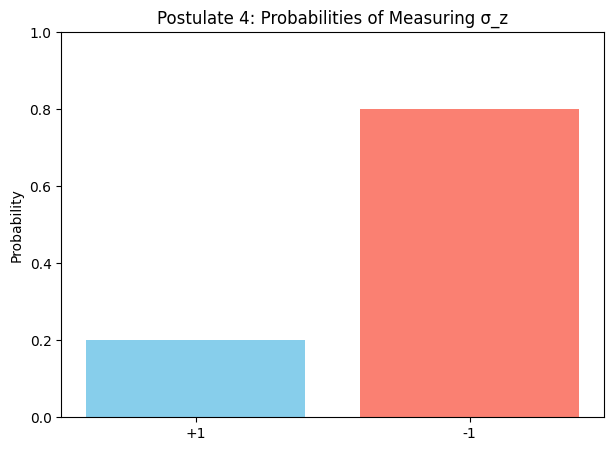

In [ ]:
print("\n--- Postulate 4: The Probability of a Measurement Outcome ---")

# Probability = |<eigenvector|ψ>|^2
prob_plus_1_array = np.abs(eigenvectors[:, 0].conj().T @ psi)**2
prob_minus_1_array = np.abs(eigenvectors[:, 1].conj().T @ psi)**2

# CORRECTED: Access the single element of the 1D result array using [0]
prob_plus_1 = prob_plus_1_array[0]
prob_minus_1 = prob_minus_1_array[0]

print(f"State |ψ⟩:\n{psi}\n")
print(f"Probability of measuring +1: |<+1|ψ>|^2 = {prob_plus_1:.2f}")
print(f"Probability of measuring -1: |<-1|ψ>|^2 = {prob_minus_1:.2f}")

# Visualization
outcomes = ['+1', '-1']
# CORRECTED: Use the float values directly
probabilities = [prob_plus_1, prob_minus_1]
plt.figure(figsize=(7, 5))
plt.bar(outcomes, probabilities, color=['skyblue', 'salmon'])
plt.ylabel("Probability")
plt.title("Postulate 4: Probabilities of Measuring σ_z")
plt.ylim(0, 1)
plt.show()

## Postulate 5: State Vector Collapse
**Quantum Mechanics Statement:** If a measurement of an observable $A$ on a system in the state $|\psi\rangle$ yields the result $a_n$, the state of the system immediately after the measurement collapses to the corresponding eigenvector $|\phi_n\rangle$.

**Translation into Linear Algebra:**
This is one of the most non-classical ideas. After a measurement is performed and a specific result is obtained, the system's state vector is no longer what it was before the measurement. It instantaneously **changes to become the eigenvector** corresponding to the eigenvalue that was measured.

**Concrete Mathematical Example:**
Suppose our system was in the state $|\psi\rangle = \frac{1}{\sqrt{5}}\begin{pmatrix} 1 \\ 2 \end{pmatrix}$. We measure the observable M and get the result -1.

According to this postulate, the state of the system right after the measurement is no longer $|\psi\rangle$. It has "collapsed" into the eigenvector corresponding to the eigenvalue -1, which is:
$$
|\psi_{\text{after}}\rangle = |\phi_2\rangle = \frac{1}{\sqrt{2}}\begin{pmatrix} 1 \\ -1 \end{pmatrix}
$$
If you were to immediately measure the observable M again on this new state, you would be guaranteed to get the result -1 with a probability of 1.


--- Postulate 5: State Vector Collapse ---
Original state:
[[0.4472136+0.j        ]
 [0.       +0.89442719j]]

Simulated measurement result for σ_z: 1

State after measurement (collapse):
[[1.]
 [0.]]



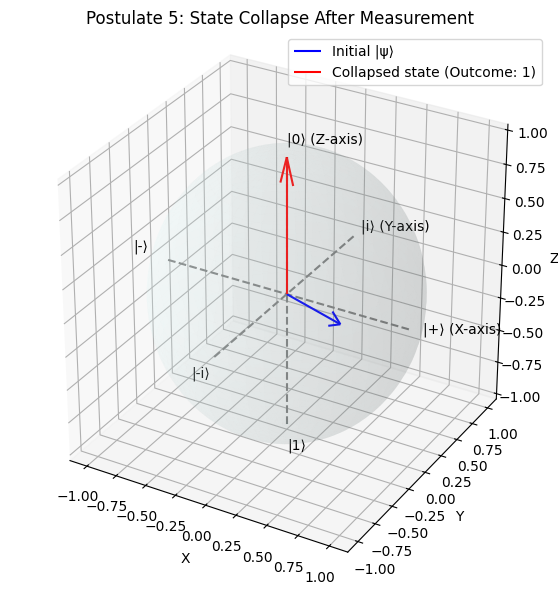

In [ ]:
print("\n--- Postulate 5: State Vector Collapse ---")

# Let's simulate a measurement.
measurement_outcome = np.random.choice(eigenvalues, p=probabilities)
if np.isclose(measurement_outcome, eigenvalues[0]):
    collapsed_state = eigenvectors[:, 0].reshape(-1, 1)
else:
    collapsed_state = eigenvectors[:, 1].reshape(-1, 1)

print(f"Original state:\n{psi}\n")
print(f"Simulated measurement result for σ_z: {measurement_outcome.real:.0f}\n")
print(f"State after measurement (collapse):\n{collapsed_state}\n")

# Visualization
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
plot_bloch_sphere(ax,
                  [psi, collapsed_state],
                  ["Initial |ψ⟩", f"Collapsed state (Outcome: {measurement_outcome.real:.0f})"],
                  ["blue", "red"],
                  "Postulate 5: State Collapse After Measurement")
plt.show()

## Postulate 6: The Time Evolution of the State
**Quantum Mechanics Statement:** The time evolution of a quantum system is governed by the Schrödinger equation: $i\hbar\frac{d}{dt}|\psi(t)\rangle = H|\psi(t)\rangle$.

**Translation into Differential Equations and Linear Algebra:**
This postulate describes how a quantum state changes over time if it is *not* being measured. The Schrödinger equation is a **system of first-order linear ordinary differential equations**.

* $|\psi(t)\rangle$ is the state vector, and its components are now functions of time.
* $H$, the Hamiltonian, is another Hermitian operator that represents the total energy of the system.
* $\hbar$ (h-bar) is the reduced Planck constant, a fundamental constant of nature.
* $i$ is the imaginary unit.

**Concrete Mathematical Example:**
Let's assume the Hamiltonian (energy operator) for our two-level system is given by $H = E_0\begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix}$, where $E_0$ is some constant with units of energy. Let the initial state of the system at time $t=0$ be $|\psi(0)\rangle = \frac{1}{\sqrt{2}}\begin{pmatrix} 1 \\ 1 \end{pmatrix}$. We want to find the state of the system at any later time $t$, $|\psi(t)\rangle = \begin{pmatrix} c_1(t) \\ c_2(t) \end{pmatrix}$.

The Schrödinger equation is:
$$
i\hbar\frac{d}{dt}\begin{pmatrix} c_1(t) \\ c_2(t) \end{pmatrix} = E_0\begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix}\begin{pmatrix} c_1(t) \\ c_2(t) \end{pmatrix} = \begin{pmatrix} E_0 c_1(t) \\ -E_0 c_2(t) \end{pmatrix}
$$
This gives us a system of two separate differential equations:
1.  $i\hbar \frac{dc_1}{dt} = E_0 c_1(t)$
2.  $i\hbar \frac{dc_2}{dt} = -E_0 c_2(t)$

With the initial conditions $c_1(0) = \frac{1}{\sqrt{2}}$ and $c_2(0) = \frac{1}{\sqrt{2}}$, the solutions are:
1.  $c_1(t) = \frac{1}{\sqrt{2}}e^{-iE_0t/\hbar}$
2.  $c_2(t) = \frac{1}{\sqrt{2}}e^{iE_0t/\hbar}$

So, the state of the system as a function of time is:
$$
|\psi(t)\rangle = \frac{1}{\sqrt{2}}\begin{pmatrix} e^{-iE_0t/\hbar} \\ e^{iE_0t/\hbar} \end{pmatrix}
$$
This new state vector tells you the probabilities of measuring any observable at any time $t$.


--- Postulate 6: Time Evolution of the State ---
Hamiltonian H = ω*σ_z:
[[ 2  0]
 [ 0 -2]]

Initial State |ψ(0)>:
[[0.70710678]
 [0.70710678]]

State after time t=π/ω:
[[0.70710678+1.73191211e-16j]
 [0.70710678-1.73191211e-16j]]



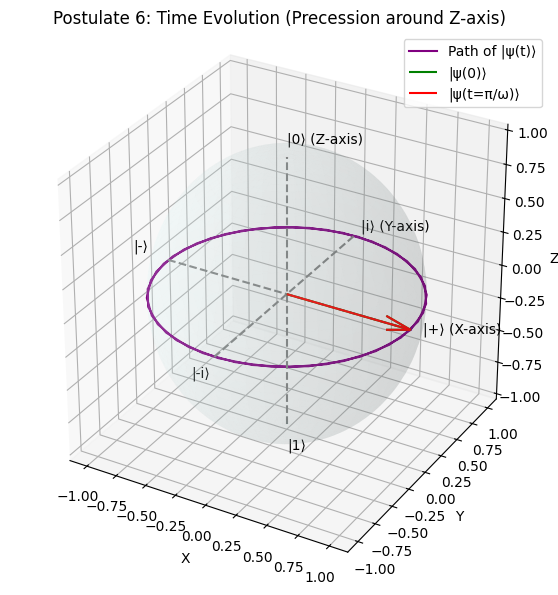

In [ ]:
print("\n--- Postulate 6: Time Evolution of the State ---")

# Time evolution is governed by the Schrödinger equation: iħ d/dt |ψ⟩ = H|ψ⟩
# Let's set ħ=1 and use H = ω * σ_z as the Hamiltonian.
omega = 2  # Frequency of precession
H = omega * sigma_z
initial_state = np.array([[1/np.sqrt(2)], [1/np.sqrt(2)]]) # State |+>

print(f"Hamiltonian H = ω*σ_z:\n{H}\n")
print(f"Initial State |ψ(0)>:\n{initial_state}\n")

# The solution is |ψ(t)> = U(t)|ψ(0)>, where U(t) = exp(-iHt)
times = np.linspace(0, np.pi, 50) # Evolve for a full period
evolved_states = []
for t in times:
    U = expm(-1j * H * t) # Note: ħ=1
    evolved_state = U @ initial_state
    evolved_states.append(evolved_state)

final_state = evolved_states[-1]
print(f"State after time t=π/ω:\n{final_state}\n")

# Visualization
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot trajectory by converting each state to Cartesian
path_x, path_y, path_z = [], [], []
for state in evolved_states:
    alpha, beta = state[0, 0], state[1, 0]
    if np.abs(alpha) < 1e-9:
        theta = np.pi
    else:
        theta = 2 * np.arccos(np.abs(alpha))
    phi = np.angle(beta) - np.angle(alpha)
    path_x.append(np.sin(theta) * np.cos(phi))
    path_y.append(np.sin(theta) * np.sin(phi))
    path_z.append(np.cos(theta))

# Plot the path
ax.plot(path_x, path_y, path_z, color='purple', label='Path of |ψ(t)⟩')

# Plot just the initial and final points
plot_bloch_sphere(ax,
                  [initial_state, final_state],
                  ["|ψ(0)⟩", "|ψ(t=π/ω)⟩"],
                  ['green', 'red'],
                  "Postulate 6: Time Evolution (Precession around Z-axis)")
plt.show()

McIntyre, D. H. (2022). Quantum Mechanics: A Paradigms Approach. Cambridge: Cambridge University Press.